In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city and ride data files and store them in pandas DataFrames.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# 120 rows, 3 columns ['city', 'driver_count', 'type'], [object, int, object]
# no nulls, 'city' is unique
# types are ['Urban', 'Suburban', 'Rural'] with 66, 36, 18 cities each
# driver count ranges from 1 to 73, mean 25, median 20.5

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# 2375 rows, no nulls
# 4 columns ['city', 'date', 'fare', 'ride_id'], [obj, obj, float, int]
# ride-id unique, 120 cities, fare ranges from 4.05 to 58.55, mean,median=26.5

ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [6]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [8]:
# aggregate data for each city
city_agg_df = pyber_data_df.groupby('city').agg(ride_count=('ride_id', (lambda x: len(x))),
                                                avg_fare=('fare', np.mean),
                                                driver_count=('driver_count', (lambda x: x.mode())),
                                                city_type=('type', (lambda x: x.mode())))

In [10]:
city_agg_df.head(2)

,ride_count,avg_fare,driver_count,city_type
city,,,,
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban


### Making bubble-chart
Can't get legend to work when plotting from one df, so separating into three like in module.

In [11]:
rural_agg_df = city_agg_df[city_agg_df['city_type'] == 'Rural']
suburban_agg_df = city_agg_df[city_agg_df['city_type'] == 'Suburban']
urban_agg_df = city_agg_df[city_agg_df['city_type'] == 'Urban']

In [12]:
rural_agg_df.head(2)

,ride_count,avg_fare,driver_count,city_type
city,,,,
Bradshawfurt,10,40.064000,7,Rural
Garzaport,3,24.123333,7,Rural


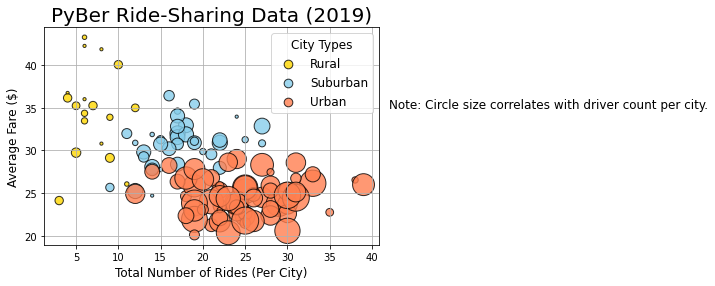

In [51]:
# organize data for plotting
plotmes = [[rural_agg_df, 'Rural', 'gold'], [suburban_agg_df, 'Suburban', 'skyblue'],
           [urban_agg_df, 'Urban', 'coral']]

# make three scatter-plots
for tripl in plotmes:
    daf = tripl[0]
    plt.scatter(daf['ride_count'], daf['avg_fare'],
                s=10*daf['driver_count'], c=tripl[2],
                edgecolor="black", linewidths=1,
                alpha=0.8, label=tripl[1])   

# add axis-labels and titles
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

### Type aggregation

In [27]:
rural_agg_df.describe()

,ride_count,avg_fare,driver_count
count,18.000000,18.000000,18.000000
mean,6.944444,34.637765,4.333333
std,2.508157,5.309337,2.828427
min,3.000000,24.123333,1.000000
25%,5.250000,31.469375,1.250000
50%,6.000000,35.121750,4.000000
75%,8.750000,36.598750,7.000000
max,12.000000,43.278333,9.000000


In [28]:
urban_agg_df.describe()

,ride_count,avg_fare,driver_count
count,66.000000,66.000000,66.000000
mean,24.621212,24.499122,36.439394
std,5.408726,2.190653,19.827819
min,12.000000,20.093158,3.000000
25%,21.000000,22.799102,22.000000
50%,24.000000,24.476732,37.000000
75%,28.000000,25.965357,49.750000
max,39.000000,28.993750,73.000000


In [29]:
suburban_agg_df.describe()

,ride_count,avg_fare,driver_count
count,36.000000,36.000000,36.000000
mean,17.361111,30.737298,13.611111
std,4.323707,2.661333,8.022389
min,9.000000,24.704286,1.000000
25%,14.000000,29.471291,6.500000
50%,17.000000,30.902010,15.000000
75%,19.250000,31.983971,20.250000
max,27.000000,36.422500,25.000000


In [30]:
suburban_agg_df['ride_count'].mode()

0    17
dtype: int64

In [31]:
urban_agg_df['ride_count'].mode()

0    22
1    25
dtype: int64

In [32]:
import scipy.stats as sts

In [33]:
sts.mode(suburban_agg_df['ride_count'])

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [34]:
sts.mode(rural_agg_df['ride_count'])

ModeResult(mode=array([6], dtype=int64), count=array([5]))

### Box-and-whiskers

Datapoints for these might be cities, or individual rides.<br>
For ride count and for driver count, only cities make sense.<br>
For fares, both make sense. The plots displayed in module have individual rides as datapoints.

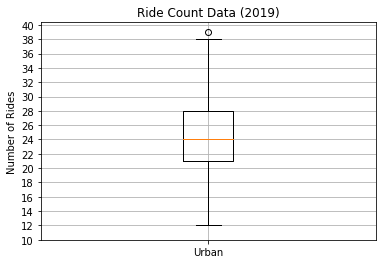

In [36]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_agg_df['ride_count'], labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

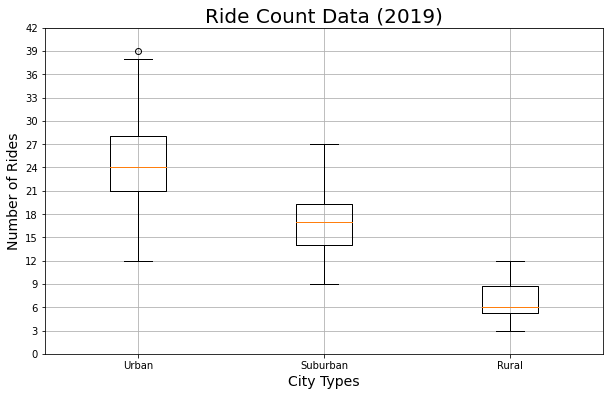

In [39]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_agg_df['ride_count'], 
                   suburban_agg_df['ride_count'], rural_agg_df['ride_count']]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

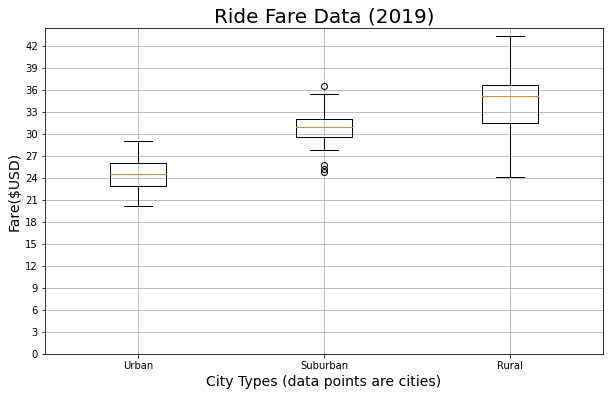

In [45]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_agg_df['avg_fare'], 
                   suburban_agg_df['avg_fare'], rural_agg_df['avg_fare']]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types (data points are cities)",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

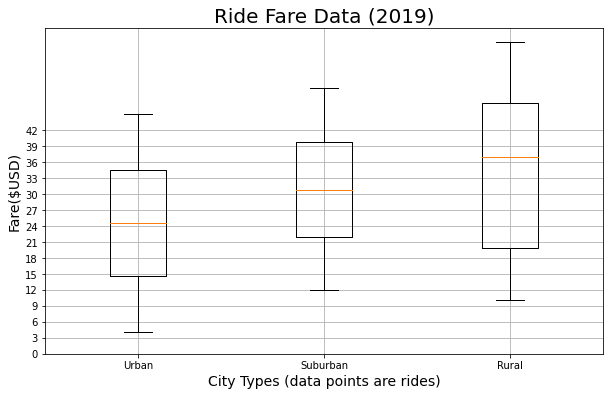

In [46]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [pyber_data_df[pyber_data_df['type']=='Urban']['fare'],
                   pyber_data_df[pyber_data_df['type']=='Suburban']['fare'],
                   pyber_data_df[pyber_data_df['type']=='Rural']['fare'] ]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types (data points are rides)",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3a.png")
plt.show()

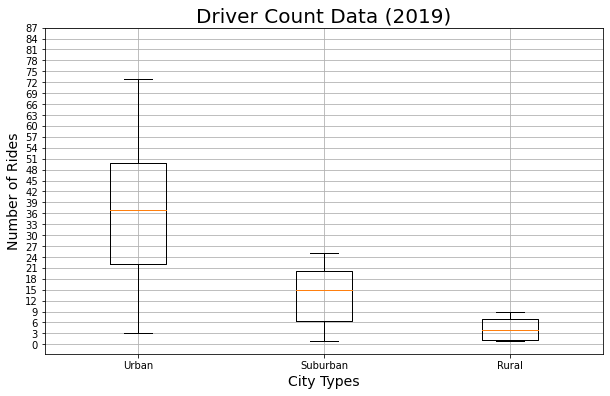

In [50]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_agg_df['driver_count'], 
                   suburban_agg_df['driver_count'], rural_agg_df['driver_count']]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 90, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

### Pies

In [53]:
# to get total fares by type in the next step
city_agg_df['sum_of_fares'] = city_agg_df['ride_count']*city_agg_df['avg_fare']

In [69]:
# we just care about driver_count, ride_count, and fare_sum
pie_df = city_agg_df.groupby('city_type').agg(sum)
pie_df.drop('avg_fare', axis=1, inplace=True)

In [70]:
pie_df

,ride_count,driver_count,sum_of_fares
city_type,,,
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


In [83]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

def show_and_file(data, title_bit, filename):
    # Build Pie Chart
    plt.subplots(figsize=(10, 6))
    plt.pie(data,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
    plt.title(f'% of Total {title_bit} by City Type')
    # Change the default font size from 10 to 14.
    mpl.rcParams['font.size'] = 14
    # Save Figure
    plt.savefig(f'analysis/{filename}.png')
    # Show Figure
    plt.show()

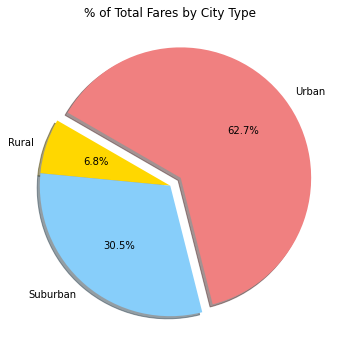

In [84]:
show_and_file(pie_df['sum_of_fares'], 'Fares', 'fare_pie')

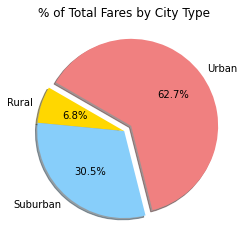

In [80]:
plt.pie(pie_df['sum_of_fares'], labels=pie_df.index, autopct='%.1f%%',
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")

plt.show()

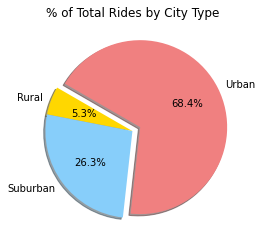

In [81]:
plt.pie(pie_df['ride_count'], labels=pie_df.index, autopct='%.1f%%',
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

plt.show()

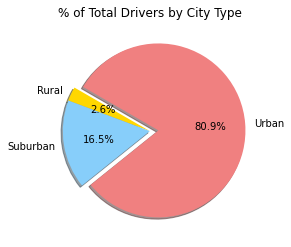

In [82]:
plt.pie(pie_df['driver_count'], labels=pie_df.index, autopct='%.1f%%',
       colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        shadow=True, startangle=150)

plt.title("% of Total Drivers by City Type")

plt.show()

In [71]:
for colnam in pie_df.columns:
    pie_df[colnam+'_perc'] = pie_df[colnam] / pie_df[colnam].sum() * 100

In [72]:
pie_df

,ride_count,driver_count,sum_of_fares,ride_countperc,driver_countperc,sum_of_faresperc
city_type,,,,,,
Rural,125,78,4327.93,5.263158,2.623613,6.811493
Suburban,625,490,19356.33,26.315789,16.481668,30.463872
Urban,1625,2405,39854.38,68.421053,80.894719,62.724635


## For type-aggregation

In [15]:
city_agg_df['sum_of_fares'] = city_agg_df['ride_count']*city_agg_df['avg_fare']

In [16]:
city_agg_df.head(2)

,ride_count,avg_fare,driver_count,city_type,sum_of_fares
city,,,,,
Amandaburgh,18,24.641667,12,Urban,443.55
Barajasview,22,25.332273,26,Urban,557.31


In [17]:
stats_by_type_df = city_agg_df.groupby('city_type')\
.agg(ride_count=('ride_count', np.sum),
     sum_of_fares=('sum_of_fares', np.sum),
     driver_count=('driver_count', np.sum))

stats_by_type_df['avg_fare'] = \
stats_by_type_df['sum_of_fares']/stats_by_type_df['ride_count']

In [18]:
stats_by_type_df

,ride_count,sum_of_fares,driver_count,avg_fare
city_type,,,,
Rural,125,4327.93,78,34.623440
Suburban,625,19356.33,490,30.970128
Urban,1625,39854.38,2405,24.525772


In [19]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
describes = {}

for typ in list(pyber_data_df['type'].unique()):
    describes[typ] = pyber_data_df[pyber_data_df['type'] == typ].describe()

['Urban', 'Suburban', 'Rural']

In [25]:
describes['Urban']

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


## converting dates to real date, in case anyone cares

In [ ]:
import datetime

In [ ]:
ride_data_df['realdate'] = ride_data_df['date'].map(lambda x: datetime.datetime.fromisoformat(x))

In [ ]:
# min '2019-01-01 00:08:16' , max '2019-05-08 13:10:18'
ride_data_df['realdate'].max()

In [ ]:
city_data_df["type"].unique()